#### Loading the dataset

In [177]:
import pandas as pd
import numpy as np

In [178]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [179]:
hybrid = pd.read_csv("C:\\Users\\acerl\\OneDrive\\Documents\\pseudo_customer_data.csv", na_values='-', encoding='latin1')
hybrid.head()

,CustomerID,Age,Gender,Annual Income (k$),Spending Score (1-100),Purchase History,Sales
0,1,41,Female,147,79,35,245
1,2,42,Male,37,32,31,403
2,3,24,Female,72,8,41,492
3,4,69,Male,60,97,70,350
4,5,23,Female,36,18,58,348


In [180]:
hybrid.shape

(5000, 7)

In [181]:
hybrid=hybrid.dropna()

In [182]:
hybrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              5000 non-null   int64 
 1   Age                     5000 non-null   int64 
 2   Gender                  5000 non-null   object
 3   Annual Income (k$)      5000 non-null   int64 
 4   Spending Score (1-100)  5000 non-null   int64 
 5   Purchase History        5000 non-null   int64 
 6   Sales                   5000 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 273.6+ KB


In [183]:
#we are checking for all the columns in the dataset
print(hybrid.columns)

Index(['CustomerID', 'Age', 'Gender', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Purchase History', 'Sales'],
      dtype='object')


In [184]:
#Drop the 'CustomerID', 'Sales', and 'Purchase History' columns
df = hybrid.drop(columns=['CustomerID', 'Sales', 'Purchase History'])

In [185]:
#checking missing values
missing_values = hybrid.isnull().sum()
missing_values

CustomerID                0
Age                       0
Gender                    0
Annual Income (k$)        0
Spending Score (1-100)    0
Purchase History          0
Sales                     0
dtype: int64

In [186]:
#handling missing data
with open("missing_values.txt", "w") as f:
    for col in hybrid.columns:
        missing = hybrid[col].isnull().sum()
        if missing > 0:
            f.write(f"{col}: {missing}\n")

with open("missing_values.txt", "r") as f:
    print(f.read())

In [187]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [188]:
# Encode the categorical variable using Label Encoding
label_encoder = LabelEncoder()
hybrid['Gender'] = label_encoder.fit_transform(hybrid['Gender'])

# Define the numerical features
features = ['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']

In [189]:
scaler = StandardScaler()
hybrid[features] = scaler.fit_transform(hybrid[features])

In [190]:
#because this is a regression problem vectorization is not needed
#vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
#X = vectorizer.fit_transform(hybrid)

In [191]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init=10, max_iter=300)
    kmeans.fit(hybrid[features])
    wcss.append(kmeans.inertia_)

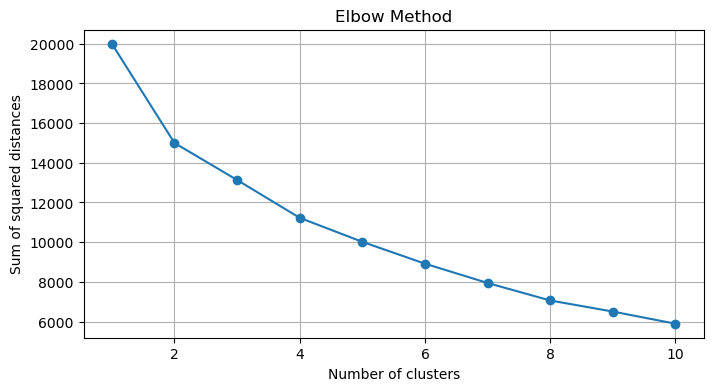

In [192]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.grid(True)
plt.show()

In [193]:
# Apply K-Means with the optimal number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(hybrid[numerical_features + ['Gender']])

C:\Users\acerl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [194]:
optimal_clusters = 5  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0, n_init=10)
clusters = kmeans.fit_predict(hybrid[features])

In [195]:
#our new dataframe
hybrid['Cluster']=clusters

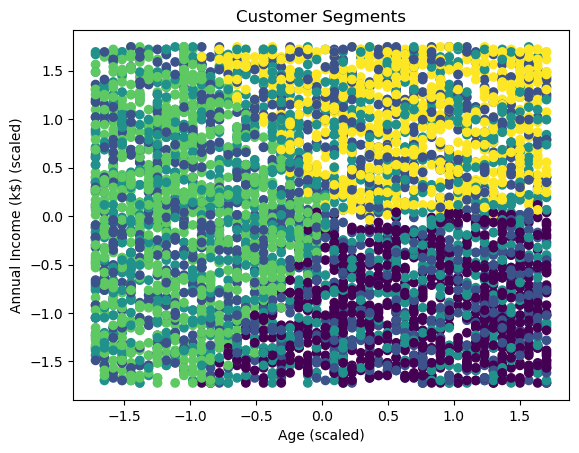

In [196]:
plt.scatter(hybrid['Age'], hybrid['Annual Income (k$)'], c=clusters, cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Age (scaled)')
plt.ylabel('Annual Income (k$) (scaled)')
plt.show()

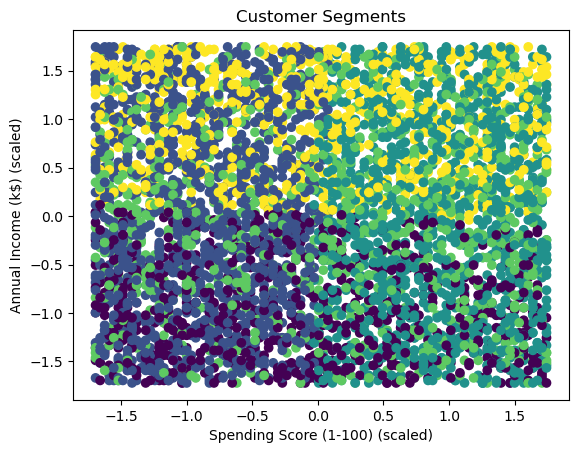

In [197]:
plt.scatter(hybrid['Spending Score (1-100)'], hybrid['Annual Income (k$)'], c=clusters, cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('Spending Score (1-100) (scaled)')
plt.ylabel('Annual Income (k$) (scaled)')
plt.show()

In [201]:
# characteristics of each customer segment
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
for i in range(optimal_clusters):
    print(f'Cluster {i}:')
    print(f'  Age: {cluster_centers[i][0]:.2f}')
    print(f'  Gender: {cluster_centers[i][1]:.2f} (0: Female, 1: Male)')
    print(f'  Annual Income (k$): {cluster_centers[i][2]:.2f}')
    print(f'  Spending Score (1-100): {cluster_centers[i][3]:.2f}')
    print()

Cluster 0:
  Age: 53.95
  Gender: 0.00 (0: Female, 1: Male)
  Annual Income (k$): 45.19
  Spending Score (1-100): 47.18

Cluster 1:
  Age: 43.81
  Gender: 1.00 (0: Female, 1: Male)
  Annual Income (k$): 82.11
  Spending Score (1-100): 25.26

Cluster 2:
  Age: 42.81
  Gender: 1.00 (0: Female, 1: Male)
  Annual Income (k$): 80.34
  Spending Score (1-100): 75.50

Cluster 3:
  Age: 28.28
  Gender: -0.00 (0: Female, 1: Male)
  Annual Income (k$): 80.97
  Spending Score (1-100): 51.69

Cluster 4:
  Age: 52.95
  Gender: 0.01 (0: Female, 1: Male)
  Annual Income (k$): 119.14
  Spending Score (1-100): 49.72



In [203]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [200]:
#Splitting the dataset into training and testing sets. 
X = hybrid[numerical_features + ['Gender']]
y = hybrid['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [126]:
#Applying regression technique that will be used to predict sales for each customer segment
l = LinearRegression()

In [127]:
l.fit(X_train, y_train)
prediction_l = l.predict(X_test)

In [128]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
prediction_random_forest = random_forest.predict(X_test)

In [129]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
prediction_dt = dt.predict(X_test)

In [130]:
#Evaluating our regression models using the mean absolute error

In [131]:
mse_l = mean_squared_error(y_test, prediction_l)
mse_dt = mean_squared_error(y_test, prediction_dt)
mse_random_forest = mean_squared_error(y_test, prediction_random_forest)


In [132]:
#Evaluating our regression models using the r2

In [133]:
r2_l = r2_score(y_test, prediction_l)
r2_random_forest = r2_score(y_test, prediction_random_forest)
r2_dt = r2_score(y_test, prediction_dt)

In [134]:
#Implementing the ensemble learning method, Gradient Boost to improve the predictive performance. 

In [135]:
gbr = GradientBoostingRegressor(n_estimators=100, random_state=0)
gbr.fit(X_train, y_train)
prediction_gbr = gbr.predict(X_test)

In [136]:
mse_gbr = mean_squared_error(y_test, prediction_gbr)
r2_gbr = r2_score(y_test, prediction_gbr)

In [137]:

print(f'Linear Regression MAE: {mse_l}, R2: {r2_l}')
print(f'Random Forest MAE: {mse_random_forest}, R2: {r2_random_forest}')
print(f'Gradient Boosting MAE: {mse_gbr}, R2: {r2_gbr}')

Linear Regression MAE: 29101.114870158577, R2: 0.6922660750354538
Random Forest MAE: 31634.0026594, R2: 0.6654816887892305
Gradient Boosting MAE: 30168.83667250647, R2: 0.6809752972603498
